In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import warnings
import time
import os
from IPython.core.debugger import set_trace
import xgboost as xgb
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats



In [69]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science/Project/tsla_2014_2023.csv',index_col='date')

In [70]:
df.corr()

,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
open,1.000000,0.999681,0.999556,0.999081,-0.048496,0.024458,0.047803,-0.010777,0.006777,0.979416,0.985958,0.964314,0.973659,0.186742,0.992499,0.840898,0.936534,0.942487,0.997923
high,0.999681,1.000000,0.999565,0.999588,-0.043794,0.027980,0.050200,-0.006634,0.009264,0.979658,0.986117,0.964683,0.973921,0.185808,0.992456,0.846708,0.938846,0.944249,0.998388
low,0.999556,0.999565,1.000000,0.999630,-0.052868,0.032187,0.054093,-0.002969,0.013449,0.978435,0.985119,0.963589,0.972926,0.190718,0.991683,0.831847,0.932206,0.938995,0.998451
close,0.999081,0.999588,0.999630,1.000000,-0.047304,0.034840,0.055775,-0.000664,0.014115,0.978644,0.985216,0.963729,0.973009,0.189382,0.991656,0.838637,0.935253,0.941290,0.998753
volume,-0.048496,-0.043794,-0.052868,-0.047304,1.000000,0.107823,0.143783,0.075128,0.097713,-0.071812,-0.069262,-0.077626,-0.074654,0.107738,-0.062349,0.145996,0.044622,0.016277,-0.046496
rsi_7,0.024458,0.027980,0.032187,0.034840,0.107823,1.000000,0.939090,0.803789,0.911994,-0.065924,-0.054771,-0.064616,-0.062122,0.411385,-0.044573,-0.041804,-0.063086,-0.073597,0.036716
rsi_14,0.047803,0.050200,0.054093,0.055775,0.143783,0.939090,1.000000,0.642162,0.800128,-0.068600,-0.050970,-0.079658,-0.070005,0.555671,-0.024142,-0.017716,-0.050404,-0.070827,0.057424
cci_7,-0.010777,-0.006634,-0.002969,-0.000664,0.075128,0.803789,0.642162,1.000000,0.843187,-0.061407,-0.057481,-0.056424,-0.057061,0.178731,-0.057156,-0.060943,-0.070969,-0.072530,0.000275
cci_14,0.006777,0.009264,0.013449,0.014115,0.097713,0.911994,0.800128,0.843187,1.000000,-0.062565,-0.056347,-0.057897,-0.058514,0.288843,-0.054715,-0.057570,-0.074360,-0.077361,0.015688
sma_50,0.979416,0.979658,0.978435,0.978644,-0.071812,-0.065924,-0.068600,-0.061407,-0.062565,1.000000,0.998735,0.990579,0.995112,-0.009817,0.991725,0.841226,0.947643,0.961874,0.977417


<Axes: xlabel='date'>

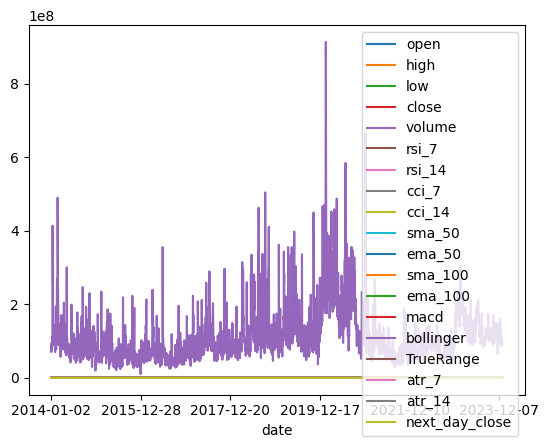

In [71]:
df.plot()

In [72]:
#checking datatypes for features
df.dtypes

open              float64
high              float64
low               float64
close             float64
volume              int64
rsi_7             float64
rsi_14            float64
cci_7             float64
cci_14            float64
sma_50            float64
ema_50            float64
sma_100           float64
ema_100           float64
macd              float64
bollinger         float64
TrueRange         float64
atr_7             float64
atr_14            float64
next_day_close    float64
dtype: object

In [73]:
#Transofrming the Date Index Column into a date_time format
df.index=pd.to_datetime(df.index)
df.index.month

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       ...
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
      dtype='int32', name='date', length=2516)

In [74]:
#Checking for missing values:
df.isnull().sum()

open              0
high              0
low               0
close             0
volume            0
rsi_7             0
rsi_14            0
cci_7             0
cci_14            0
sma_50            0
ema_50            0
sma_100           0
ema_100           0
macd              0
bollinger         0
TrueRange         0
atr_7             0
atr_14            0
next_day_close    0
dtype: int64

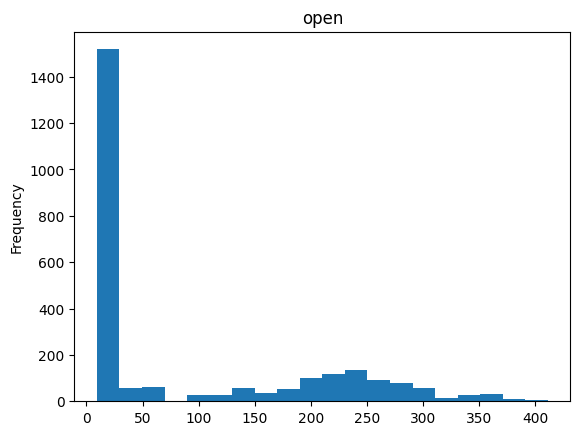

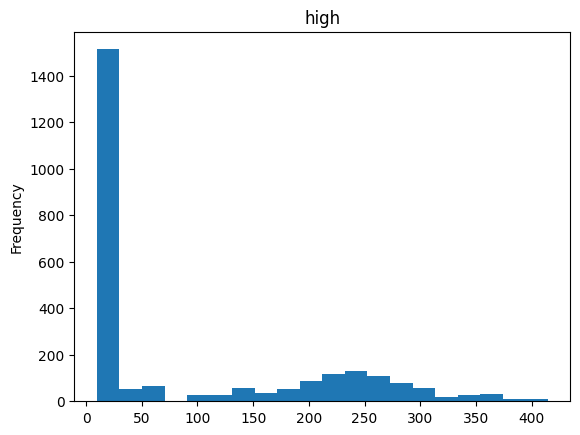

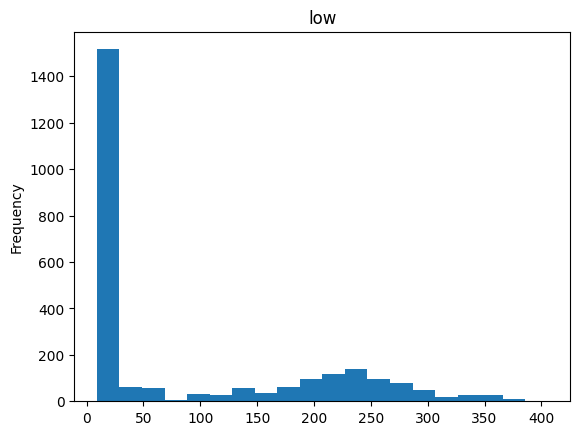

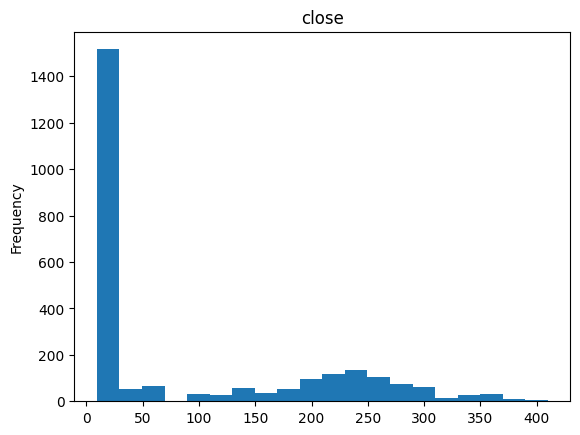

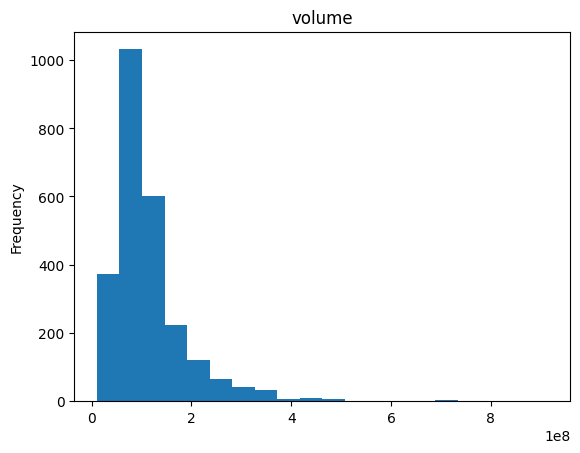

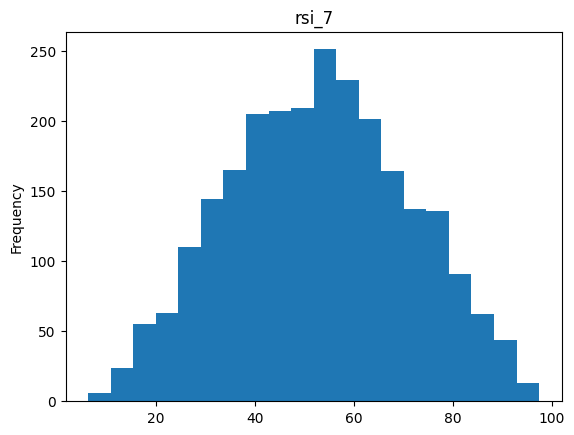

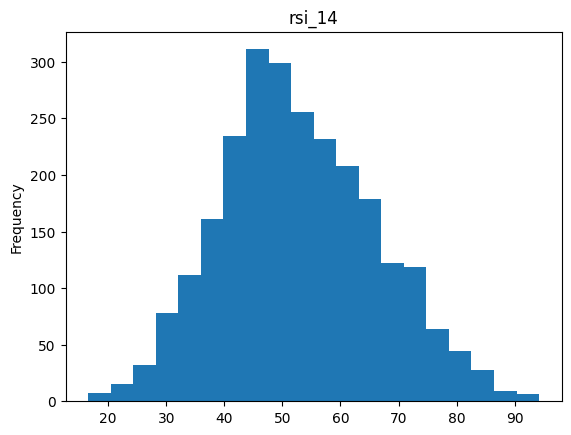

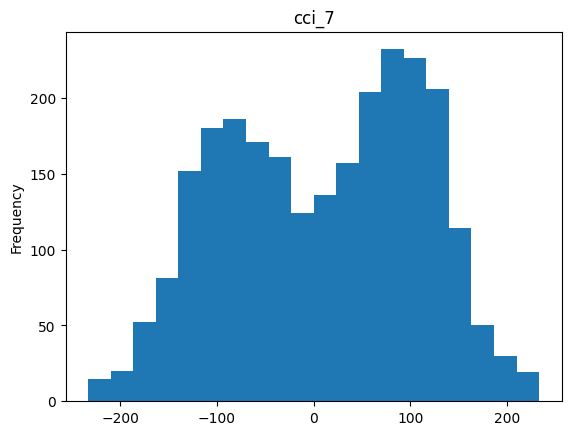

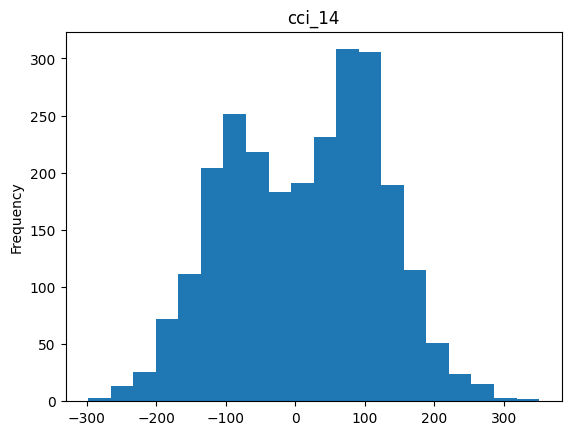

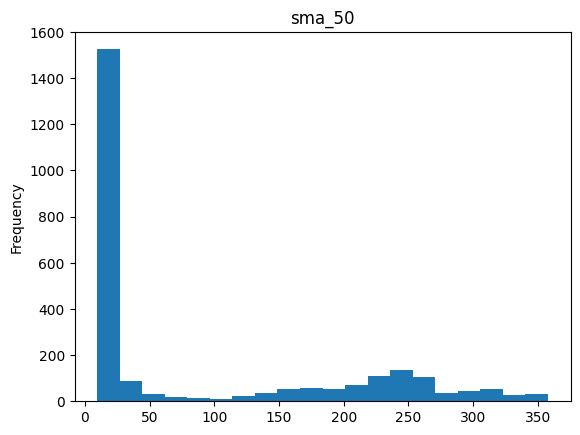

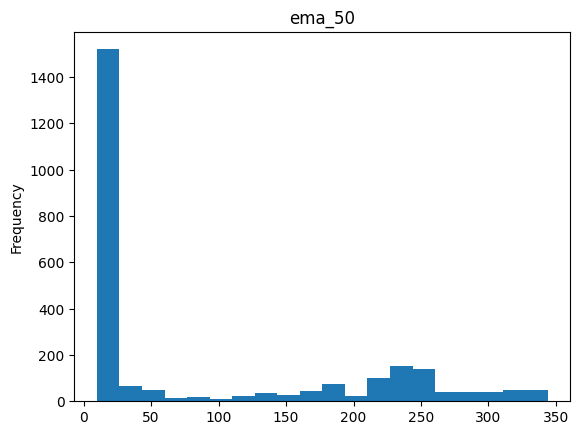

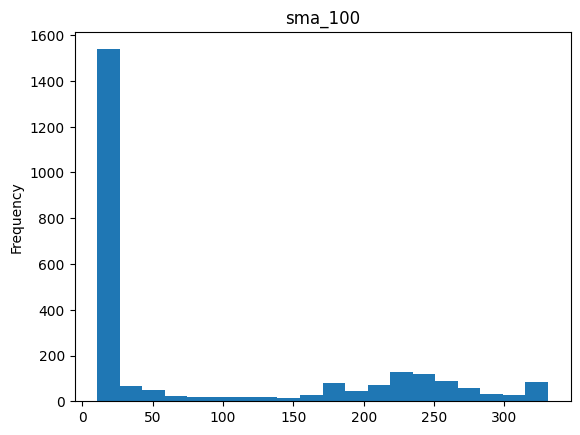

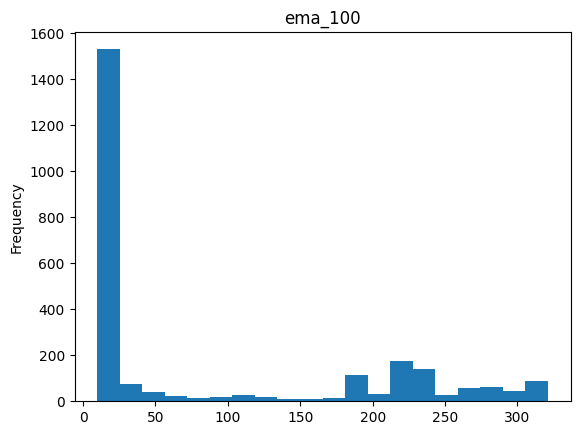

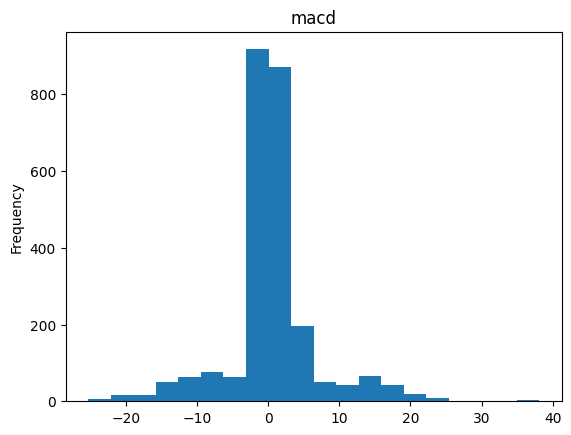

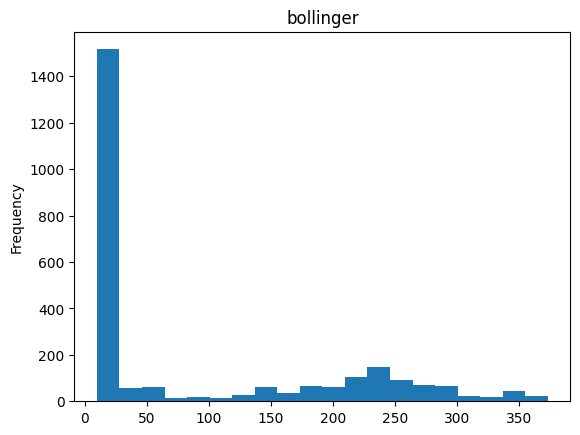

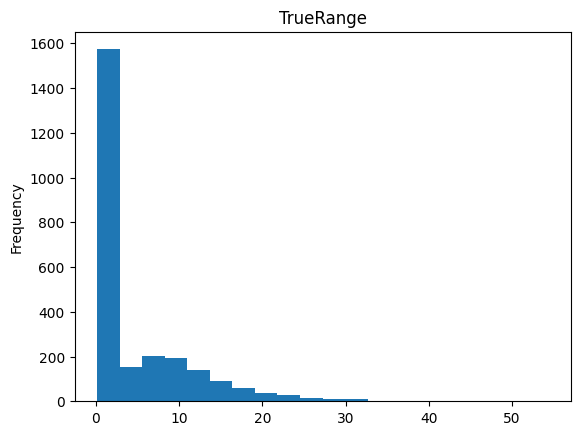

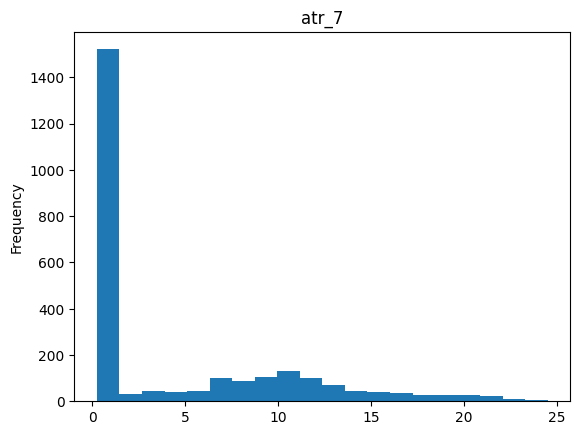

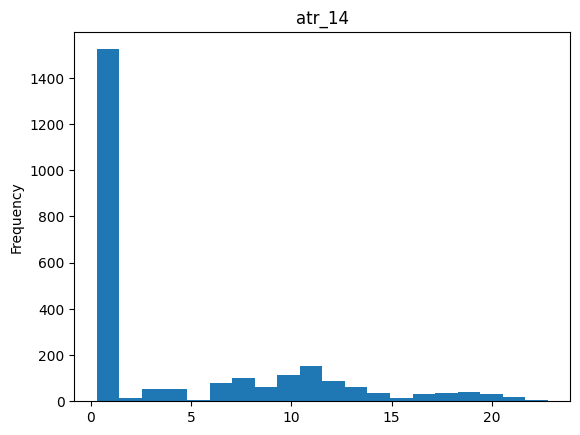

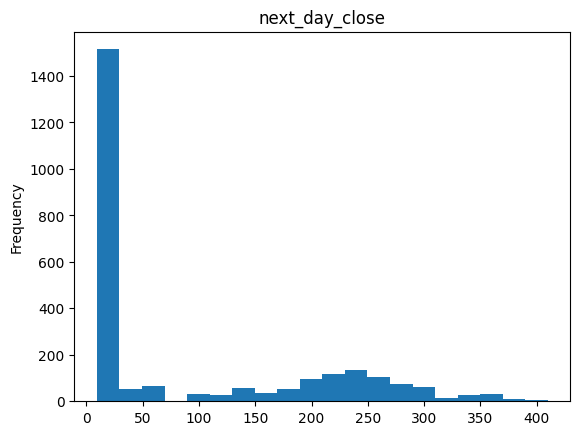

In [75]:
#Plotting the features using a histogram
for i in df.columns:
  df[i].plot(kind='hist', bins=20, title=i)
  plt.show()

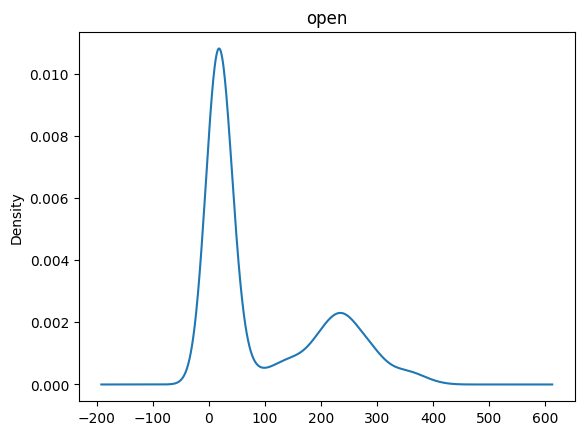

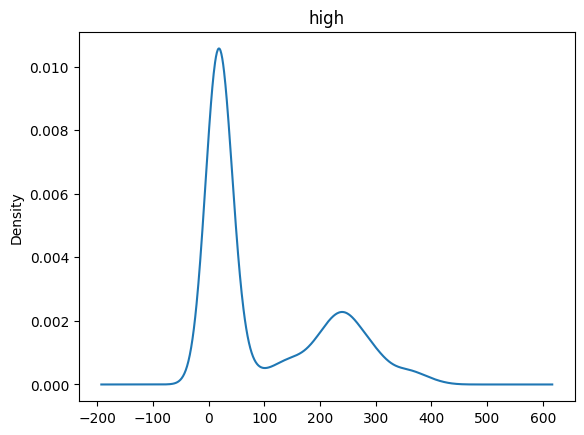

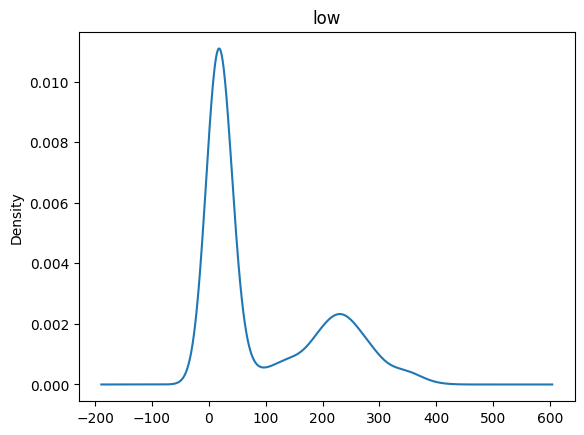

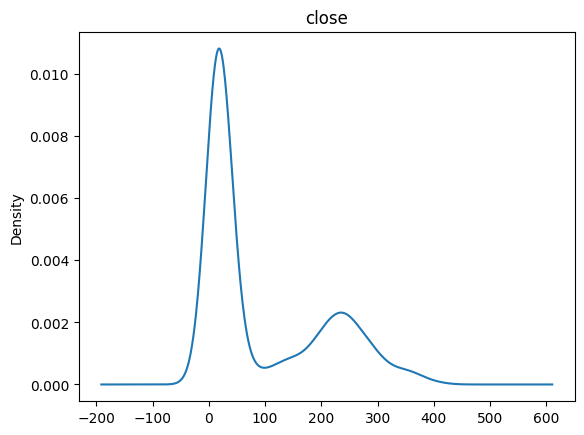

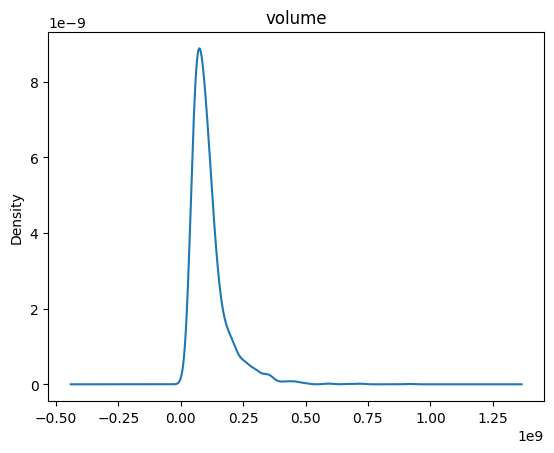

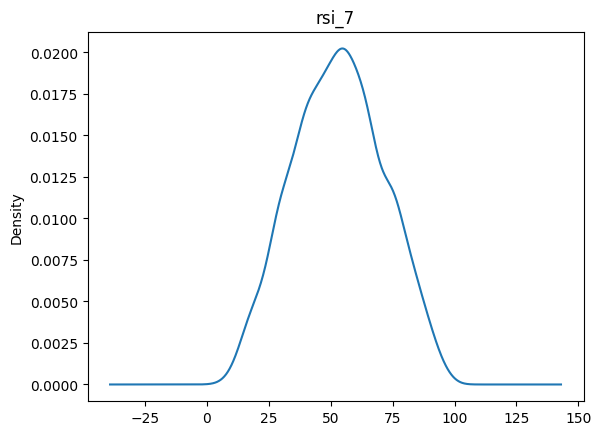

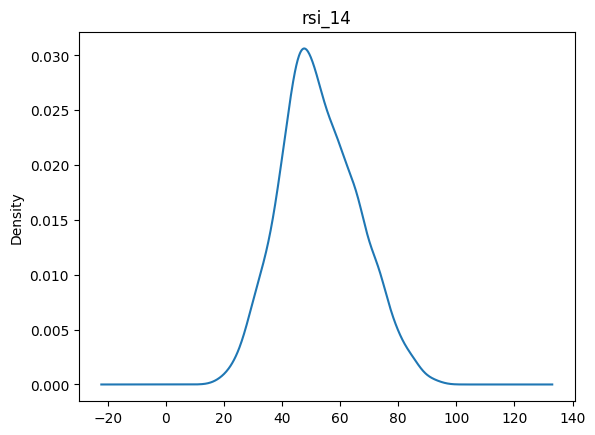

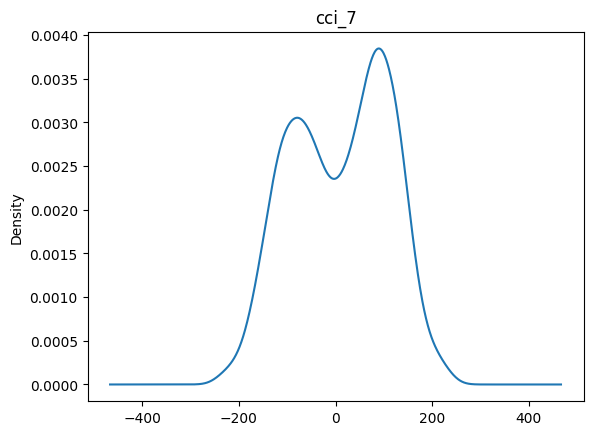

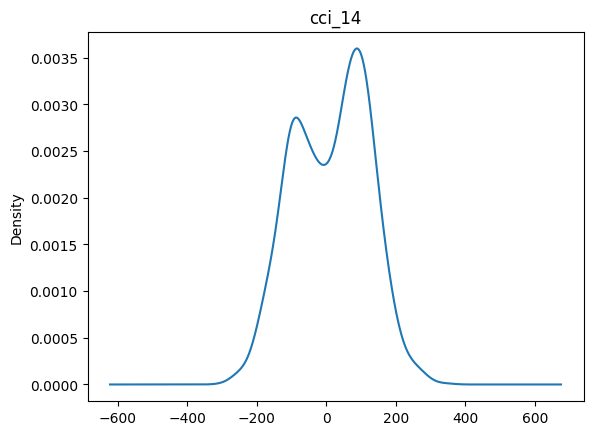

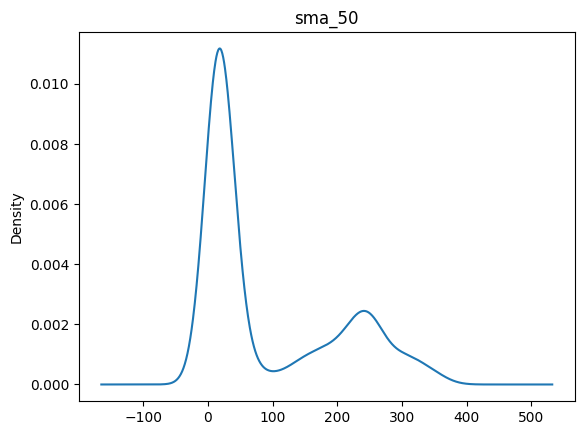

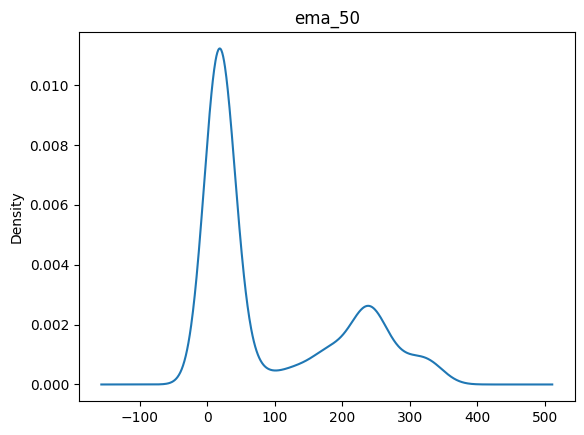

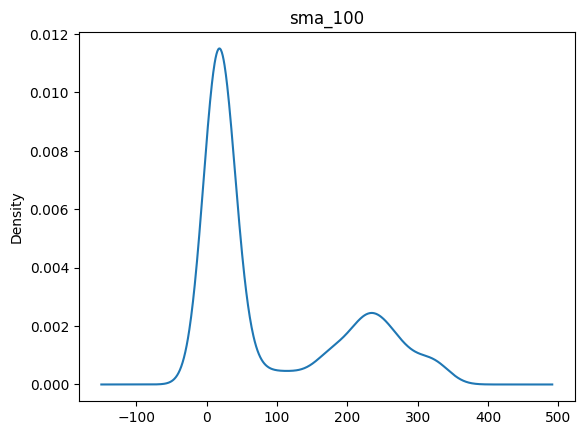

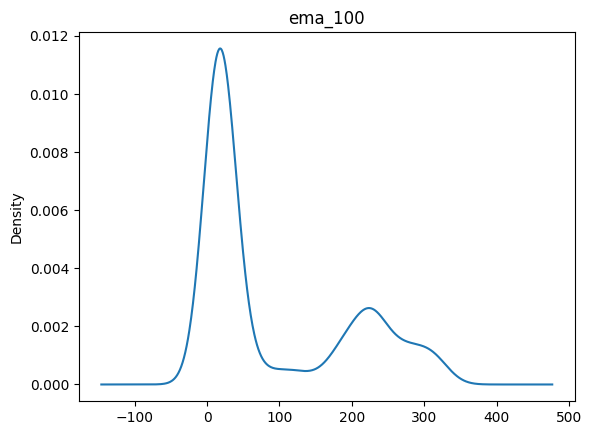

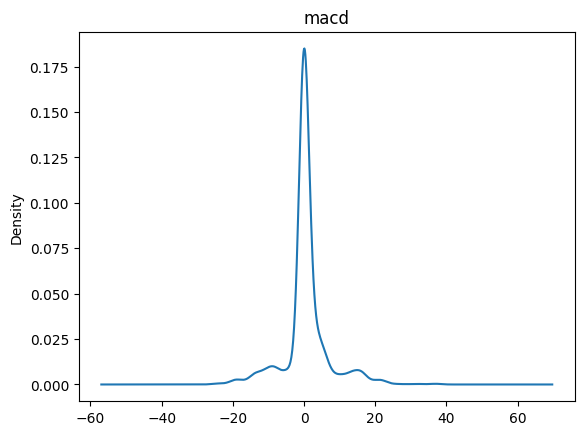

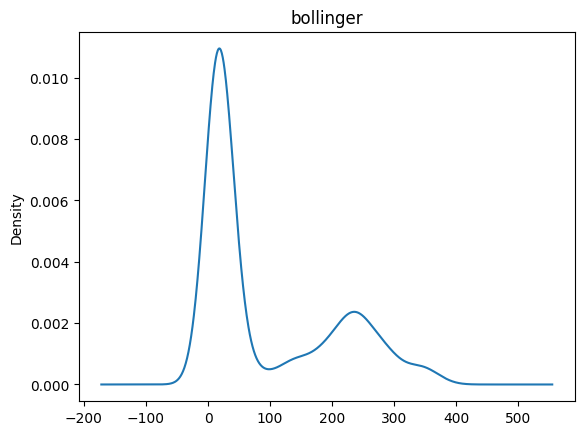

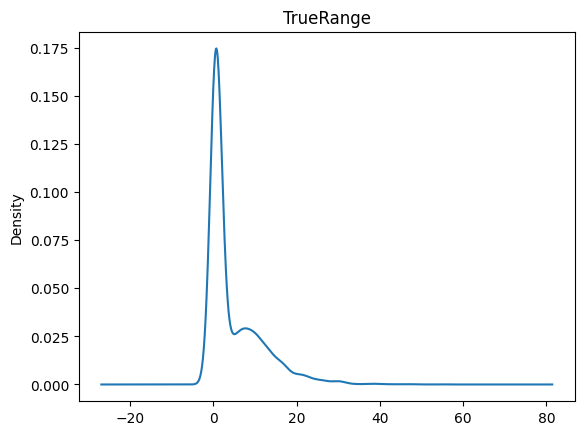

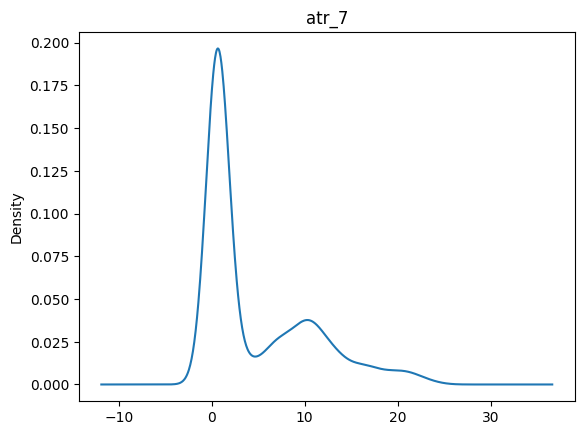

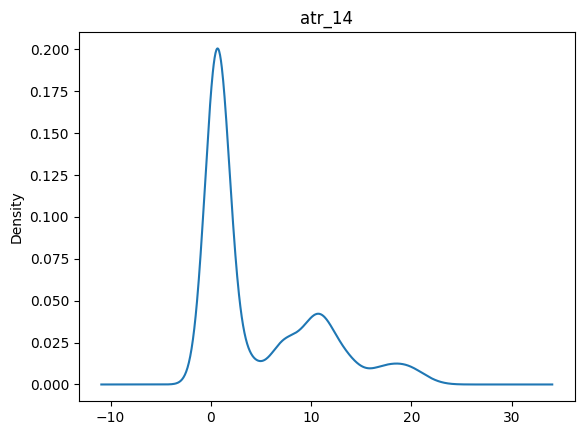

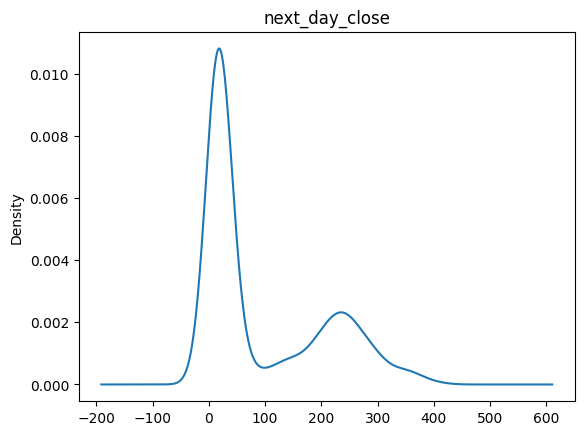

In [76]:
#Plotting the features using a Kernel Density
for i in df.columns:
  df[i].plot(kind='kde', title=i)
  plt.show()

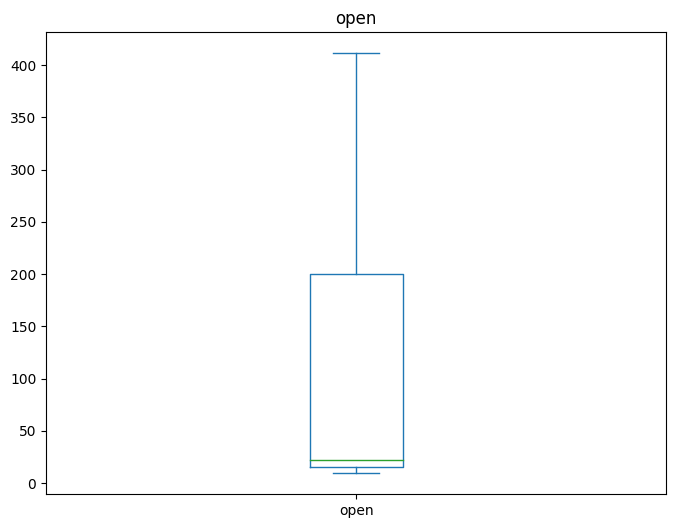

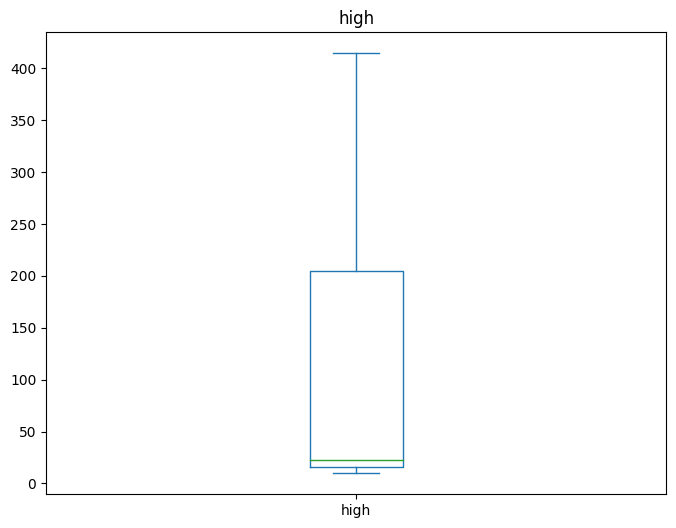

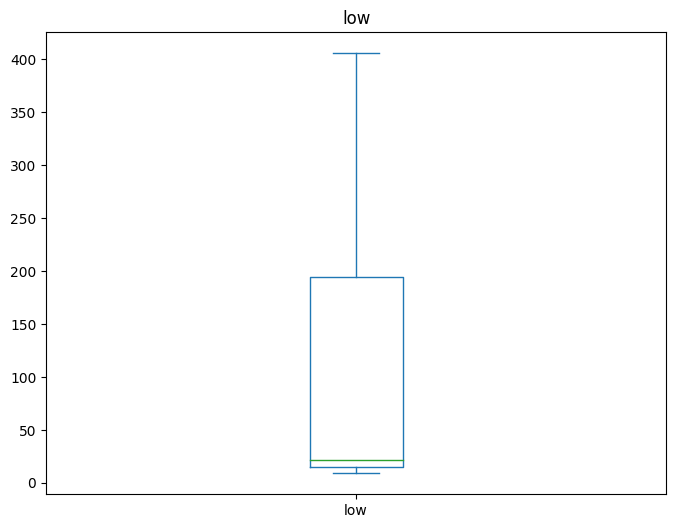

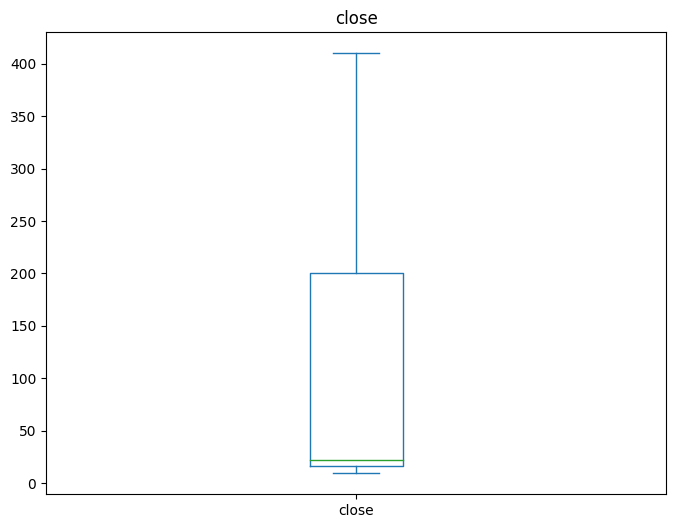

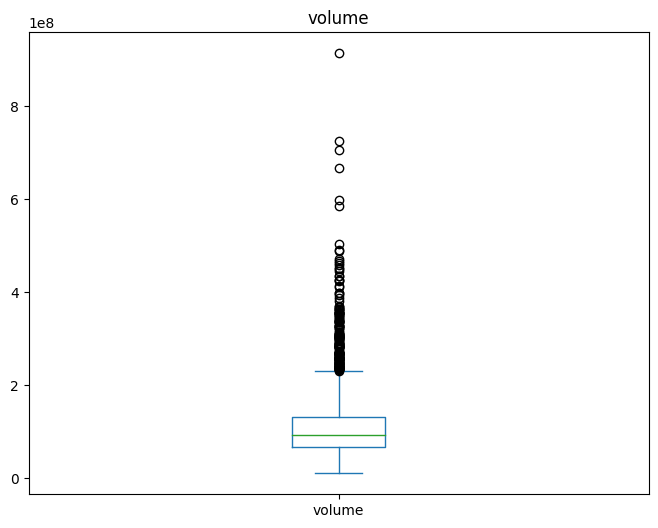

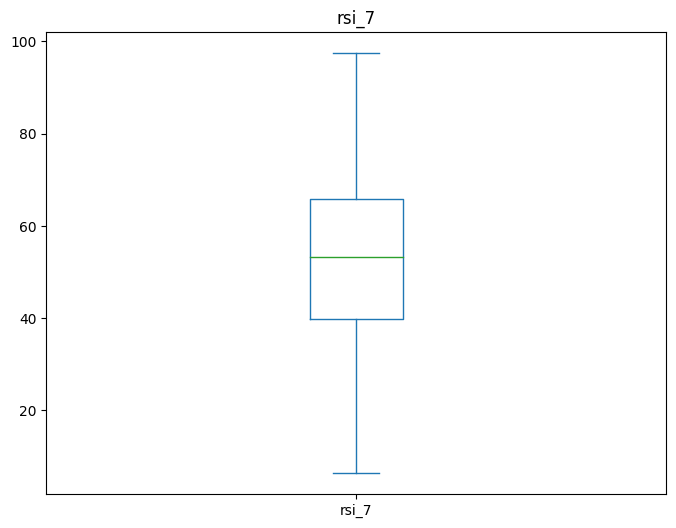

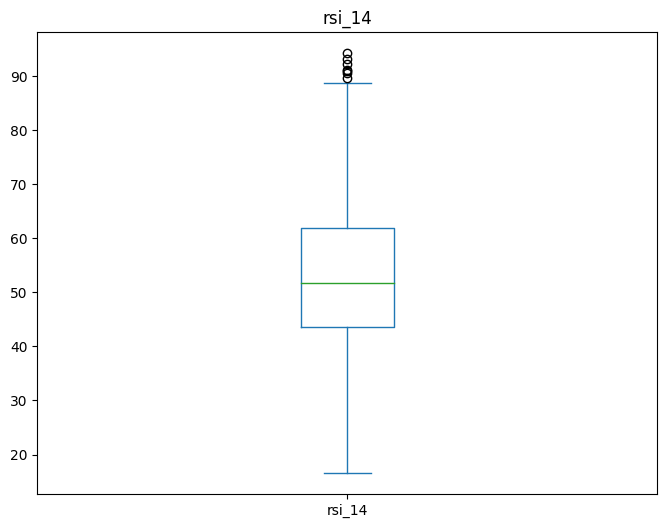

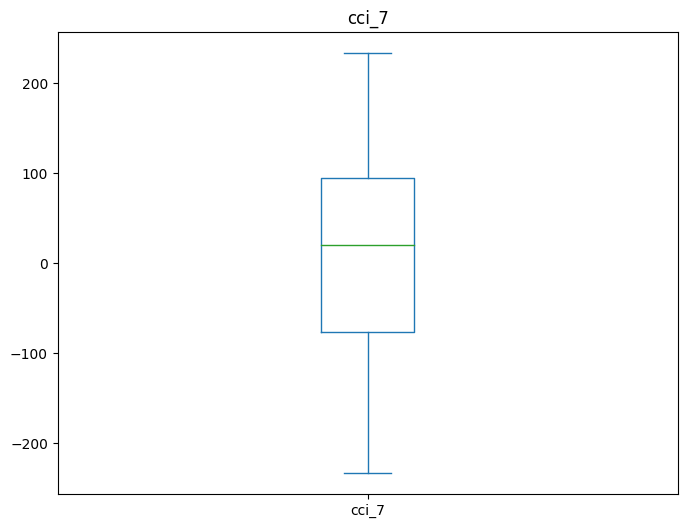

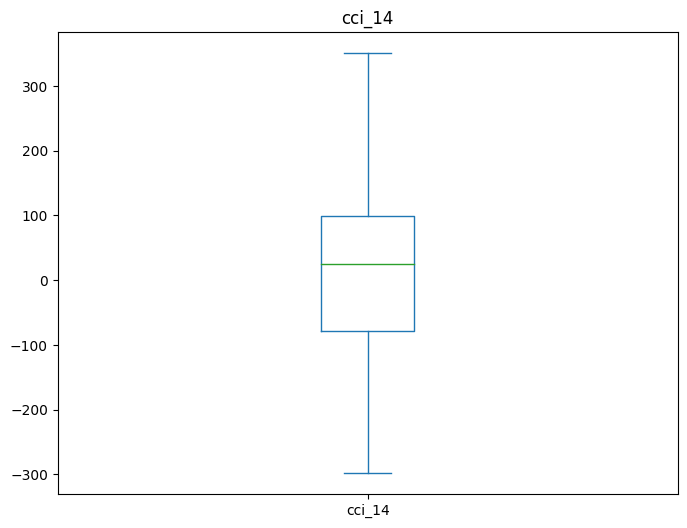

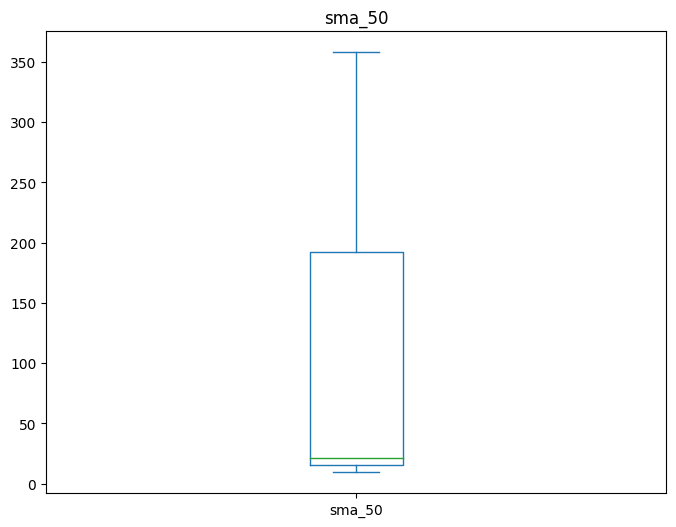

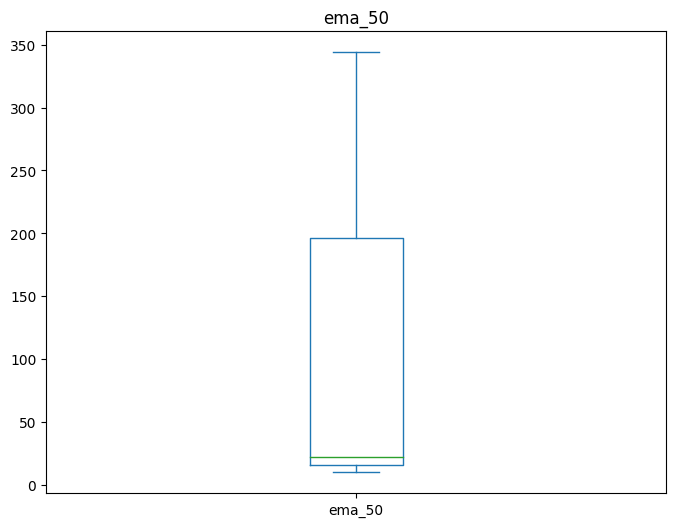

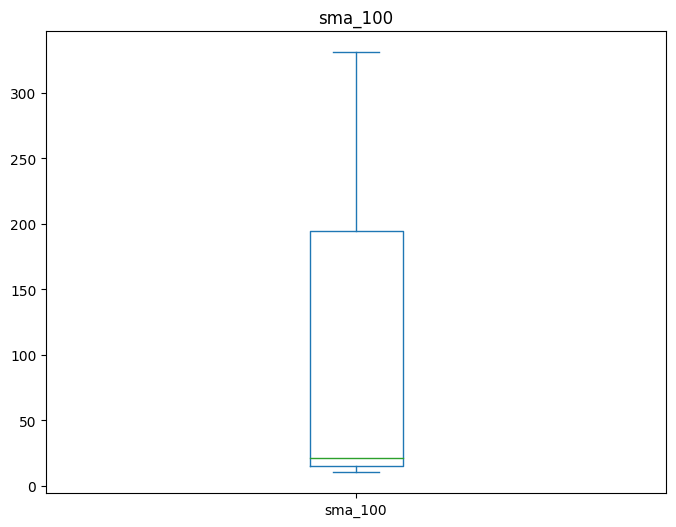

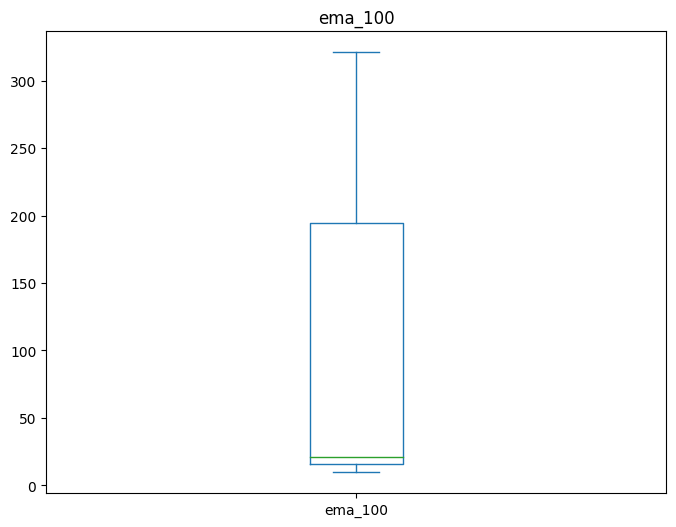

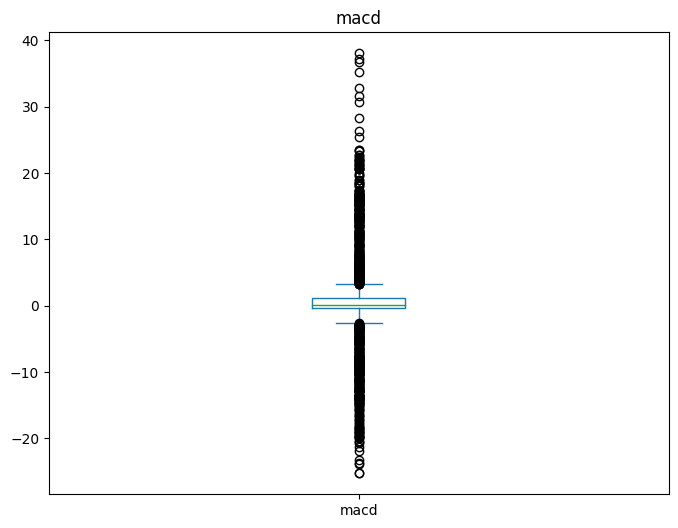

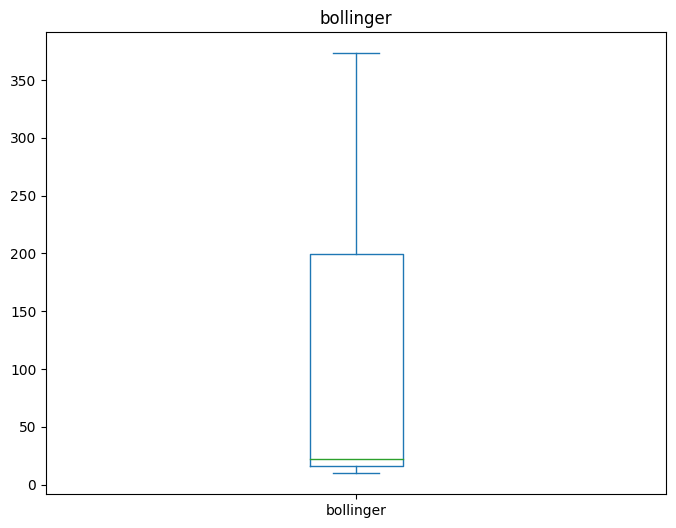

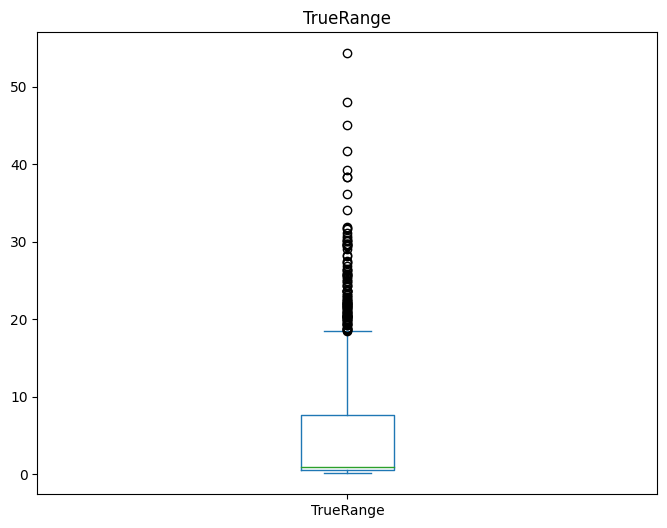

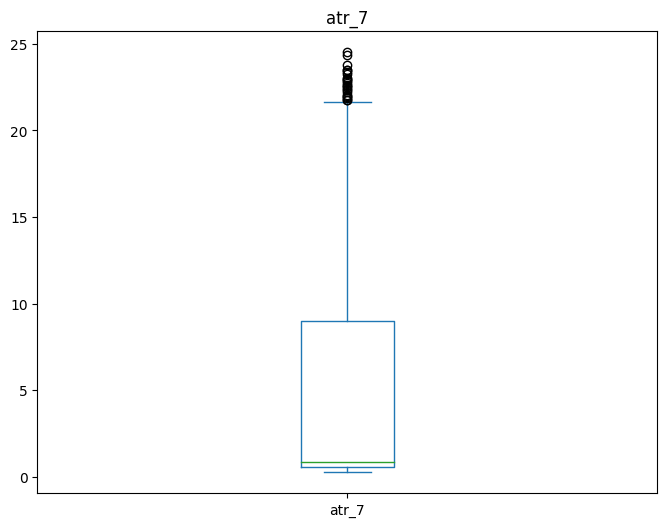

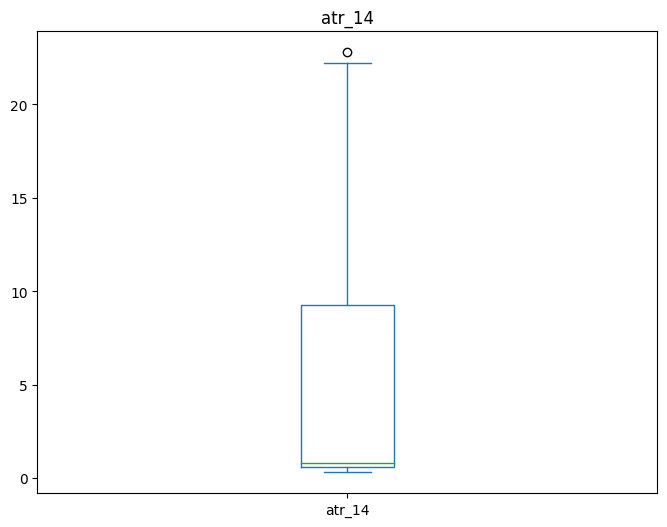

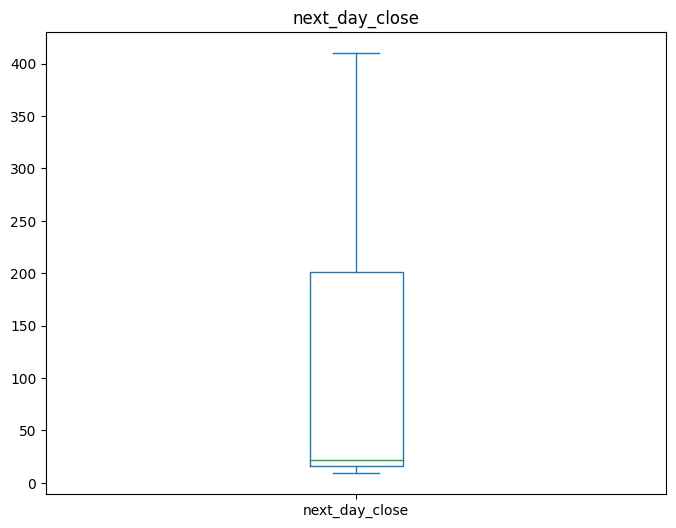

In [77]:
#Plotting the features using boxplot to detect outliers
for i in df.columns:
  df[i].plot(kind='box', figsize=(8,6), title=i)
  plt.show()

In [78]:
# # #Outlier removal from volume
# df['Volume'].tail(10)
# df=df[df['Volume']<45000000]
# df['Volume'].plot(kind='box', figsize=(8,6), title='Volume')

In [79]:
#Showing Correlation
df.corr()

,open,high,low,close,volume,rsi_7,rsi_14,cci_7,cci_14,sma_50,ema_50,sma_100,ema_100,macd,bollinger,TrueRange,atr_7,atr_14,next_day_close
open,1.000000,0.999681,0.999556,0.999081,-0.048496,0.024458,0.047803,-0.010777,0.006777,0.979416,0.985958,0.964314,0.973659,0.186742,0.992499,0.840898,0.936534,0.942487,0.997923
high,0.999681,1.000000,0.999565,0.999588,-0.043794,0.027980,0.050200,-0.006634,0.009264,0.979658,0.986117,0.964683,0.973921,0.185808,0.992456,0.846708,0.938846,0.944249,0.998388
low,0.999556,0.999565,1.000000,0.999630,-0.052868,0.032187,0.054093,-0.002969,0.013449,0.978435,0.985119,0.963589,0.972926,0.190718,0.991683,0.831847,0.932206,0.938995,0.998451
close,0.999081,0.999588,0.999630,1.000000,-0.047304,0.034840,0.055775,-0.000664,0.014115,0.978644,0.985216,0.963729,0.973009,0.189382,0.991656,0.838637,0.935253,0.941290,0.998753
volume,-0.048496,-0.043794,-0.052868,-0.047304,1.000000,0.107823,0.143783,0.075128,0.097713,-0.071812,-0.069262,-0.077626,-0.074654,0.107738,-0.062349,0.145996,0.044622,0.016277,-0.046496
rsi_7,0.024458,0.027980,0.032187,0.034840,0.107823,1.000000,0.939090,0.803789,0.911994,-0.065924,-0.054771,-0.064616,-0.062122,0.411385,-0.044573,-0.041804,-0.063086,-0.073597,0.036716
rsi_14,0.047803,0.050200,0.054093,0.055775,0.143783,0.939090,1.000000,0.642162,0.800128,-0.068600,-0.050970,-0.079658,-0.070005,0.555671,-0.024142,-0.017716,-0.050404,-0.070827,0.057424
cci_7,-0.010777,-0.006634,-0.002969,-0.000664,0.075128,0.803789,0.642162,1.000000,0.843187,-0.061407,-0.057481,-0.056424,-0.057061,0.178731,-0.057156,-0.060943,-0.070969,-0.072530,0.000275
cci_14,0.006777,0.009264,0.013449,0.014115,0.097713,0.911994,0.800128,0.843187,1.000000,-0.062565,-0.056347,-0.057897,-0.058514,0.288843,-0.054715,-0.057570,-0.074360,-0.077361,0.015688
sma_50,0.979416,0.979658,0.978435,0.978644,-0.071812,-0.065924,-0.068600,-0.061407,-0.062565,1.000000,0.998735,0.990579,0.995112,-0.009817,0.991725,0.841226,0.947643,0.961874,0.977417


In [80]:
# #Removing highly Correlated Feature
# df = df.drop('Adj Close', axis=1)

In [81]:
#Creating Window Features:
#Adding rolling mean
df['month_Close'] = df['close'].rolling(30).mean()
warnings.filterwarnings('ignore')

In [82]:
#Measuring how different the closing price is on a given day from the monthly average
df['month_day_Close'] = df['month_Close'] / df['close']
warnings.filterwarnings('ignore')

In [83]:
#Measuring the ratio between the Close and Open prices
df['Close_Open']=df['close'] / df['open']
warnings.filterwarnings('ignore')

In [84]:
# Define weighted moving average function
def weighted_moving_average(prices, weights):
    return np.dot(prices, weights)

window_size = 5  # Adjust as needed
weights = np.arange(1, window_size + 1)  # Example weights, adjust as needed

# Compute WMA and add it as a feature
df['WMA'] = df['close'].rolling(window=window_size).apply(lambda prices: weighted_moving_average(prices, weights), raw=True)
df.dropna(inplace=True)  # Drop rows with NaN values after computing WMA

Accuracy: 0.9970530026303559,  MSE: 8.652402161235562, RMSE: 2.9414965852836823, MAE: 2.2458987100079595


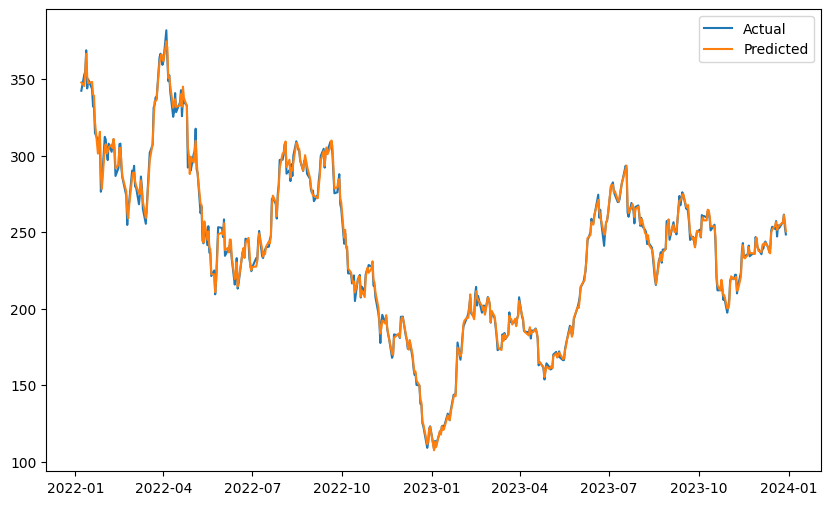

In [85]:
# Create lag features
df['Close_Lag1'] = df['close'].shift(1)
df['Close_Lag2'] = df['close'].shift(2)
df['Close_Lag3'] = df['close'].shift(3)

# Drop rows with missing values created due to some window features
df.dropna(inplace=True)

# Prepare features and target
features = df[['open', 'high', 'low', 'volume', 'Close_Lag1', 'Close_Lag2', 'Close_Lag3','month_Close', 'month_day_Close', 'Close_Open', 'WMA']]
target = df['close']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

#Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model=linear_model.Ridge(alpha=0.5)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print(f'Accuracy: {accuracy},  MSE: {mse}, RMSE: {rmse}, MAE: {mae}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.legend()
plt.show()

In [86]:
df.corr()['close']

open               0.999074
high               0.999585
low                0.999627
close              1.000000
volume            -0.046012
rsi_7              0.040711
rsi_14             0.062776
cci_7              0.001901
cci_14             0.020457
sma_50             0.978483
ema_50             0.985104
sma_100            0.963460
ema_100            0.972806
macd               0.189726
bollinger          0.991594
TrueRange          0.837734
atr_7              0.934816
atr_14             0.940885
next_day_close     0.998744
month_Close        0.986859
month_day_Close   -0.053094
Close_Open         0.006596
WMA                0.999208
Close_Lag1         0.998743
Close_Lag2         0.997563
Close_Lag3         0.996347
Name: close, dtype: float64

Accuracy: 0.993758564024774, MSE: 4.2807585659138, RMSE: 2.9414965852836823, MAE: 3.0735036675485143


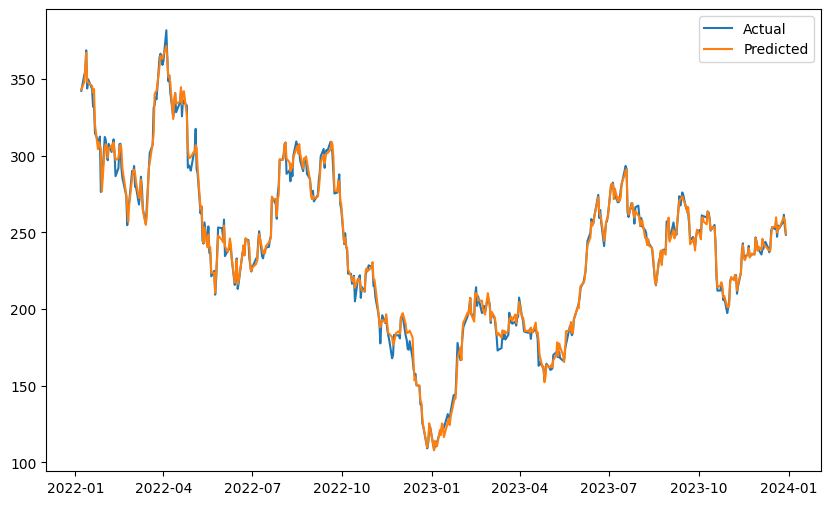

In [87]:
model=GradientBoostingRegressor()
# model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred, squared = False)
mae = mean_absolute_error(y_test, y_pred)
print(f'Accuracy: {accuracy}, MSE: {mse}, RMSE: {rmse}, MAE: {mae}')

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.legend()
plt.show()

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Accuracy: 0.9933475537609331, MSE: 19.53162252851203, RMSE: 4.41945952900488, MAE: 3.157375164150058


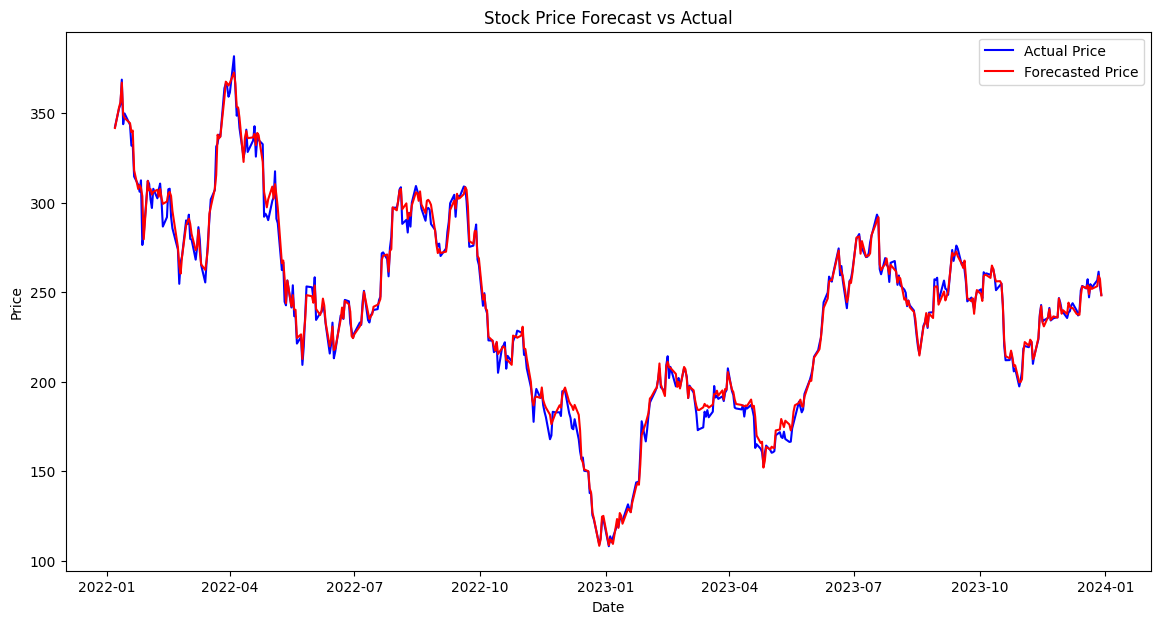

In [88]:
#Hyper Parameter tuning for Gradient Boosting

param_grid = {
    'n_estimators' : [100, 200, 300],
    'learning_rate' : [0.01, 0.05, 0.1],
    'max_depth' : [3, 4, 5]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

accuracy = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print(f'Accuracy: {accuracy}, MSE: {mse}, RMSE: {rmse}, MAE: {mae}')
# print(f'Best Parameters: {grid_search.best_params_}')

# Plot the forecasted versus actual data
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Price', color='b')
plt.plot(y_test.index, y_pred, label='Forecasted Price', color='r')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Forecast vs Actual')
plt.legend()
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 2516
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -7812.256
Date:                Mon, 27 May 2024   AIC                          15638.512
Time:                        16:18:00   BIC                          15679.322
Sample:                             0   HQIC                         15653.324
                               - 2516                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0140      0.606     -0.023      0.982      -1.201       1.173
ar.L2          0.0132      0.020      0.646      0.518      -0.027       0.053
ar.L3         -0.0078      0.014     -0.541      0.5

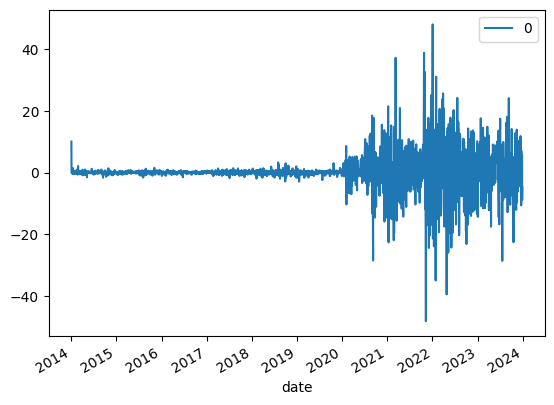

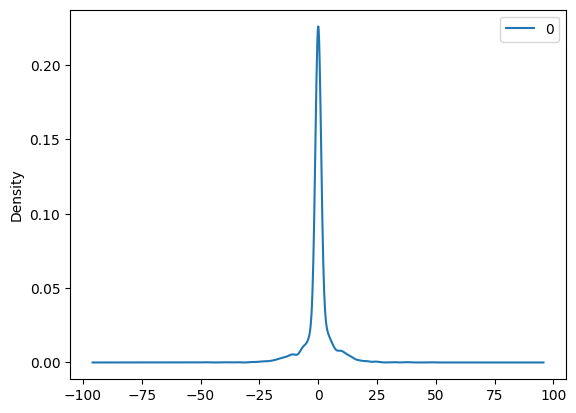

                 0
count  2516.000000
mean      0.096587
std       5.407810
min     -47.990586
25%      -0.439126
50%       0.022527
75%       0.558162
max      47.857962
predicted=99.810367, expected=99.305336
predicted=98.663826, expected=96.847336
predicted=97.146278, expected=94.571335
predicted=94.573525, expected=91.625999
predicted=91.156853, expected=103.650665
predicted=103.411358, expected=108.066666
predicted=107.873332, expected=110.047333
predicted=111.696704, expected=122.375999
predicted=121.934914, expected=125.806000
predicted=127.236352, expected=125.235336
predicted=127.639265, expected=133.455338
predicted=133.375858, expected=136.665329
predicted=137.580325, expected=134.279999
predicted=136.326084, expected=134.889328
predicted=134.787883, expected=143.544662
predicted=143.568483, expected=149.250000
predicted=150.232527, expected=147.559998
predicted=149.234298, expected=166.106674
predicted=167.906299, expected=158.350006
predicted=159.216716, expected=149.12333

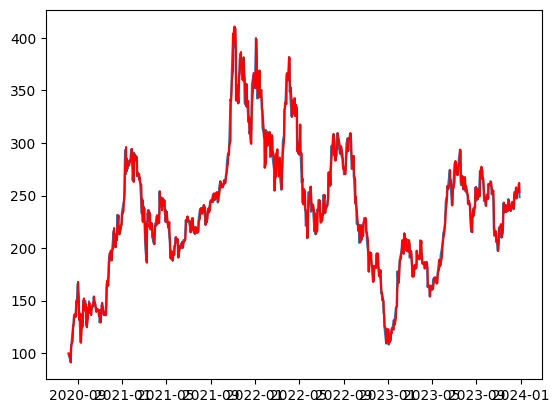

In [89]:
series = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Science/Project/tsla_2014_2023.csv', header=0, parse_dates=[0], index_col=0)

# Selecting the 'Close' column as a Series
series = series['close']

# Fit ARIMA model
model = ARIMA(series, order=(5, 1, 1))
model_fit = model.fit()

# Summary of fit model
print(model_fit.summary())

# Line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

# Density plot of residuals
residuals.plot(kind='kde')
plt.show()

# Summary stats of residuals
print(residuals.describe())

# evaluate an ARIMA model using a walk-forward validation
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
accuracy = r2_score(test, predictions)
mse = mean_squared_error(test, predictions, squared=False)
mae = mean_absolute_error(test, predictions)
print(f'Accuracy: {accuracy}, MSE: {mse}, MAE: {mae}')

# plot forecasts against actual outcomes
plt.plot(series[size:len(X)])
plt.plot(pd.Series(predictions, index=series.index[size:len(series)]), color='red')
plt.show()

Accuracy: 0.9896415983816615, MSE: 30.41233001177796, RMSE: 5.514737528820203, MAE: 4.152009608173455


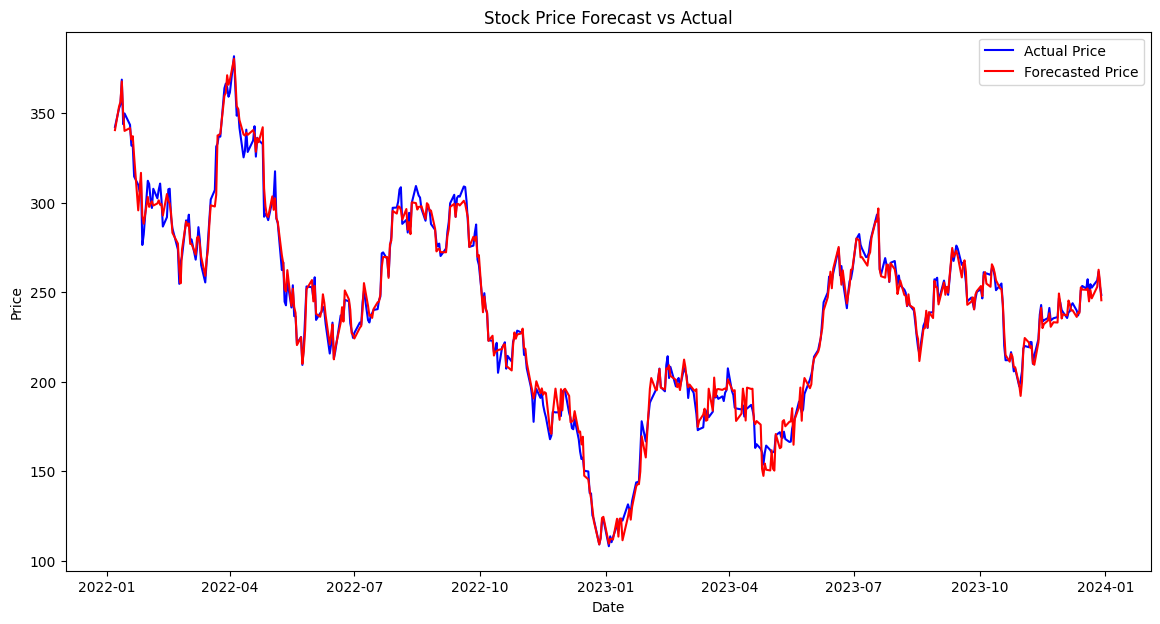

In [90]:
# Create the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror')


model.fit(X_train, y_train)


# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print(f'Accuracy: {accuracy}, MSE: {mse}, RMSE: {rmse}, MAE: {mae}')
# print(f'Best Parameters: {grid_search.best_params_}')

# Plot the forecasted versus actual data
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Price', color='b')
plt.plot(y_test.index, y_pred, label='Forecasted Price', color='r')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Forecast vs Actual')
plt.legend()
plt.show()


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Accuracy: 0.9932324268682892, MSE: 19.869635783966327, RMSE: 4.457536963836231, MAE: 3.3531077284890984
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}


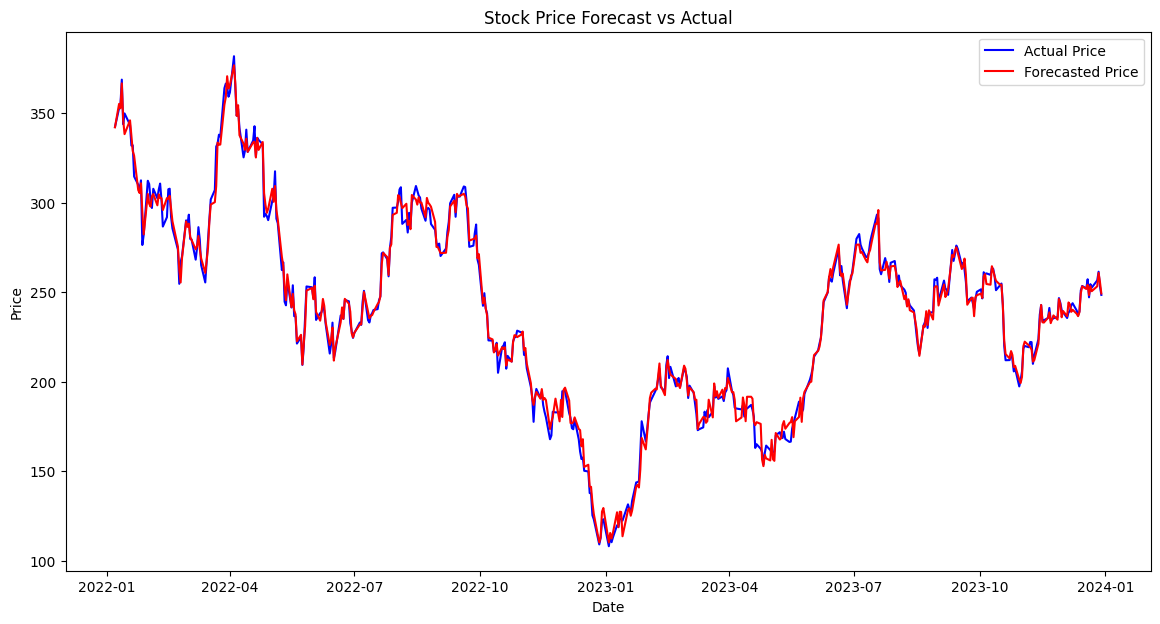

In [91]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

# Create the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror')

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2', verbose=1)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print(f'Accuracy: {accuracy}, MSE: {mse}, RMSE: {rmse}, MAE: {mae}')
print(f'Best Parameters: {grid_search.best_params_}')

# Plot the forecasted versus actual data
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Price', color='b')
plt.plot(y_test.index, y_pred, label='Forecasted Price', color='r')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Forecast vs Actual')
plt.legend()
plt.show()

Accuracy: 0.9992418530472771
Mean Squared Error (MSE): 2.22592405403665
Root Mean Squared Error (RMSE): 1.491953100481597
Mean Absolute Error (MAE): 1.117299697902925


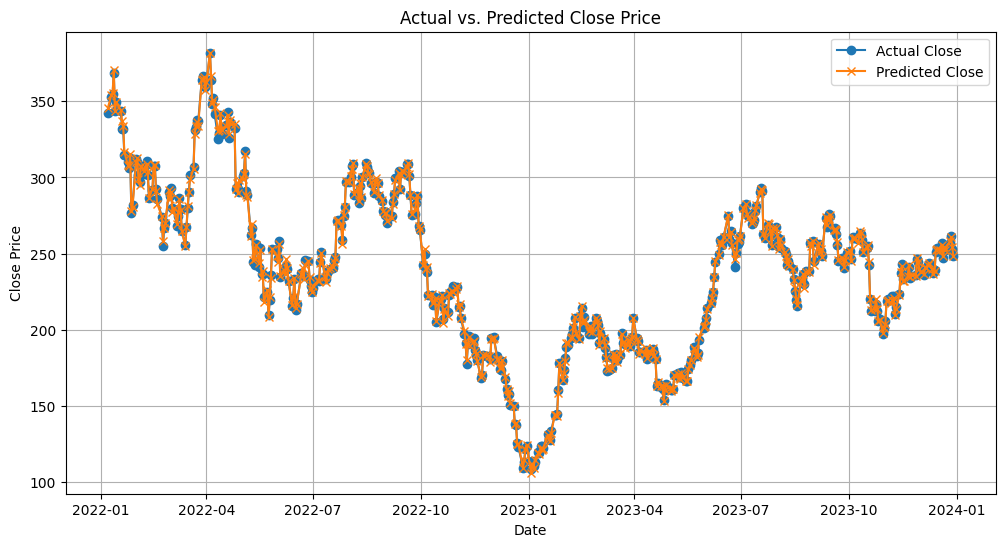

In [92]:
#Applying Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

# Plotting Predictions vs. Actual
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test):], y_test, label='Actual Close', marker='o')
plt.plot(df.index[-len(y_test):], y_pred, label='Predicted Close', marker='x')
plt.title('Actual vs. Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()
